<a href="https://colab.research.google.com/github/VishalSingh1703/ML-Practice/blob/main/Data_Loader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np
import torch
import torch.nn as nn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader

In [43]:
iris = sns.load_dataset('iris')

# convert from pnadas dataframe to tensor
data = torch.tensor( iris[iris.columns[0:4]].values ).float()

# tranform species to number
labels = torch.zeros(len(data), dtype = torch.long)

labels[iris.species == 'versicolor'] = 1
labels[iris.species == 'virginica'] = 2

In [44]:
# use scikitlearn to split the data
train_data, test_data, train_labels, test_labels = \
          train_test_split(data, labels, train_size = 0.8)

# convert them inot PyTorch Datasets
train_data = torch.utils.data.TensorDataset(train_data, train_labels)
test_data = torch.utils.data.TensorDataset(test_data, test_labels)

# finally, translate into dataloader objects
train_loader = DataLoader(train_data, shuffle = True, batch_size = 12)
test_loader = DataLoader(test_data, batch_size = test_data.tensors[0].shape[0])

In [45]:
for X, y in train_loader:
  print(X.shape, y.shape)
X, y

torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])


(tensor([[5.1000, 3.7000, 1.5000, 0.4000],
         [6.9000, 3.1000, 5.1000, 2.3000],
         [5.5000, 3.5000, 1.3000, 0.2000],
         [5.9000, 3.0000, 4.2000, 1.5000],
         [6.4000, 2.8000, 5.6000, 2.2000],
         [6.3000, 2.5000, 4.9000, 1.5000],
         [6.9000, 3.1000, 4.9000, 1.5000],
         [5.6000, 2.9000, 3.6000, 1.3000],
         [4.9000, 2.4000, 3.3000, 1.0000],
         [5.8000, 2.8000, 5.1000, 2.4000],
         [6.5000, 3.0000, 5.2000, 2.0000],
         [7.7000, 3.8000, 6.7000, 2.2000]]),
 tensor([0, 2, 0, 1, 2, 1, 1, 1, 1, 2, 2, 2]))

In [46]:
# a function that creates the ANN model
def createANewModel():
  ANNiris = nn.Sequential(
      nn.Linear(4, 64),
      nn.ReLU(),
      nn.Linear(64, 64),
      nn.ReLU(),
      nn.Linear(64, 3)
  )

  lossfun = nn.CrossEntropyLoss()

  optimizer = torch.optim.SGD(ANNiris.parameters(), lr = .01)

  return ANNiris, lossfun, optimizer

In [47]:
numepochs = 500

def trainTheModel():

  # initialize accuracies as empties (not storing losses here)
  trainAcc = []
  testAcc  = []

  # loop over epochs
  for epochi in range(numepochs):


    # loop over training data batches
    batchAcc = []
    for X,y in train_loader:

      # forward pass and loss
      yHat = ANNiris(X)
      loss = lossfun(yHat,y)

      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # compute training accuracy just for this batch
      batchAcc.append( 100*torch.mean((torch.argmax(yHat,axis=1) == y).float()).item() )
    # end of batch loop...


    # now that we've trained through the batches, get their average training accuracy
    trainAcc.append( np.mean(batchAcc) )

    # test accuracy
    X,y = next(iter(test_loader)) # extract X,y from test dataloader
    predlabels = torch.argmax( ANNiris(X),axis=1 )
    testAcc.append( 100*torch.mean((predlabels == y).float()).item() )

  # function output
  return trainAcc,testAcc

In [48]:
ANNiris,lossfun,optimizer = createANewModel()

# train the model
trainAcc,testAcc = trainTheModel()

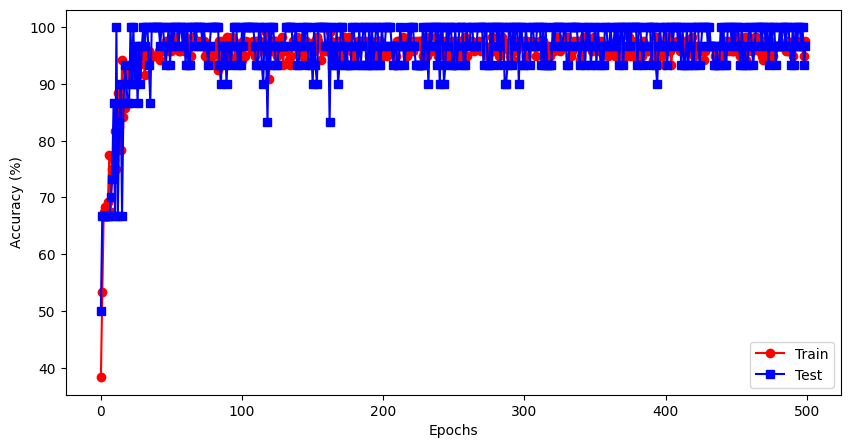

In [49]:
fig = plt.figure(figsize=(10,5))

plt.plot(trainAcc,'ro-')
plt.plot(testAcc,'bs-')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend(['Train','Test'])

# optional zoom-in to final epochs
# plt.xlim([300,500])
# plt.ylim([90,100.5])

plt.show()